# 7. 用matplotlib实现数据可视化


## 7.5 matplotlib & numpy

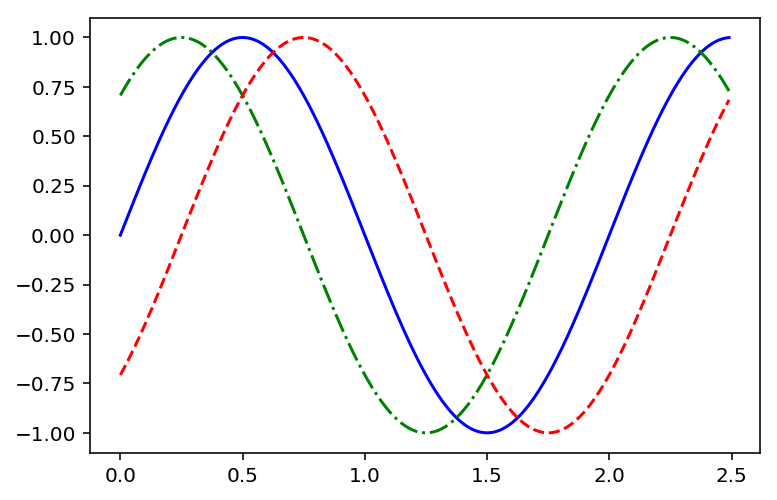

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
% config InlineBackend.figure_format='retina'

t  = np.arange(0,2.5,0.01)
y1 = np.sin(np.pi*t)
y2 = np.sin(np.pi*t + np.pi/4)
y3 = np.sin(np.pi*t - np.pi/4)

plt.plot(t,y1,'b-',
         t,y2,'g-.',
         t,y3,'r--')
# plt.show()

## 7.6 使用kwargs

* ** matplotlib.pyplot.plot( \*args, \*\*kwargs) **      
 例如可以修改 **linewidth** ，改变线条粗细。

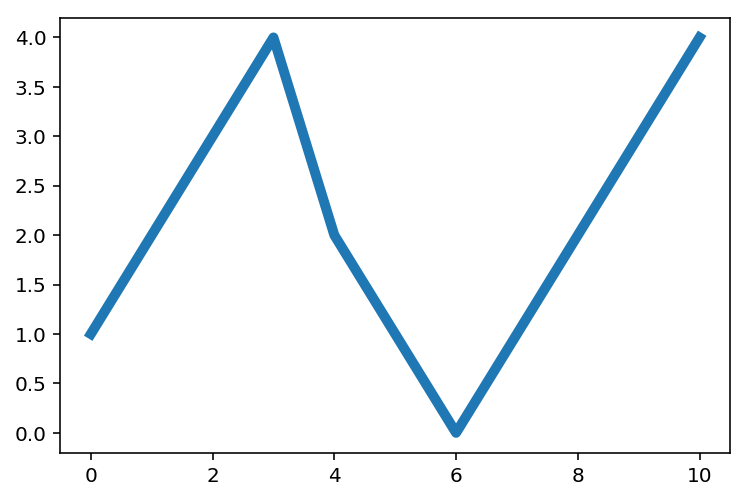

In [2]:
plt.plot([1,2,3,4,2,1,0,1,2,3,4],linewidth=5.0)

### 处理多个Figure和Axes对象

* 用 **subplot** 可以将图形分为不同的绘图区域，还可以激活特定子图，以便用命令控制。   
 **subplot** 的参数有三个部分组成：      
 1. 决定图形沿竖直方向被分为几个部分。      
 2. 决定图形沿水平方向被分为几个部分。    
 3. 可以直接用命令控制的子图。   

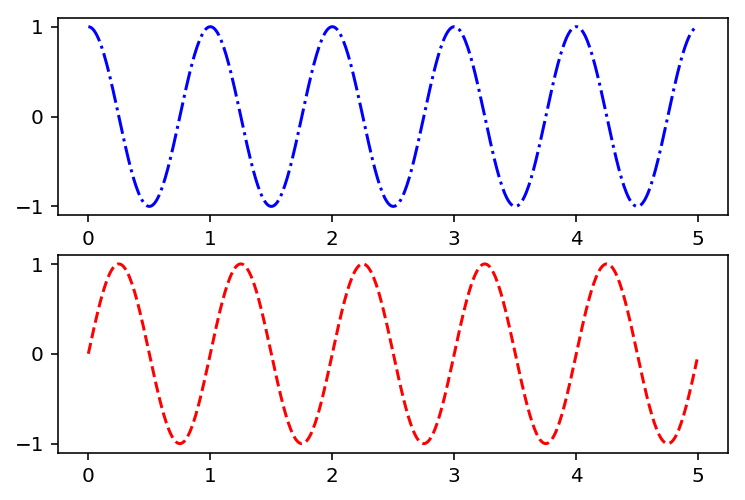

In [3]:
t  = np.arange(0,5,0.01)
y1 = np.cos(2*np.pi*t)
y2 = np.sin(2*np.pi*t)

plt.subplot(211)
plt.plot(t,y1,'b-.')
plt.subplot(212)
plt.plot(t,y2,'r--')

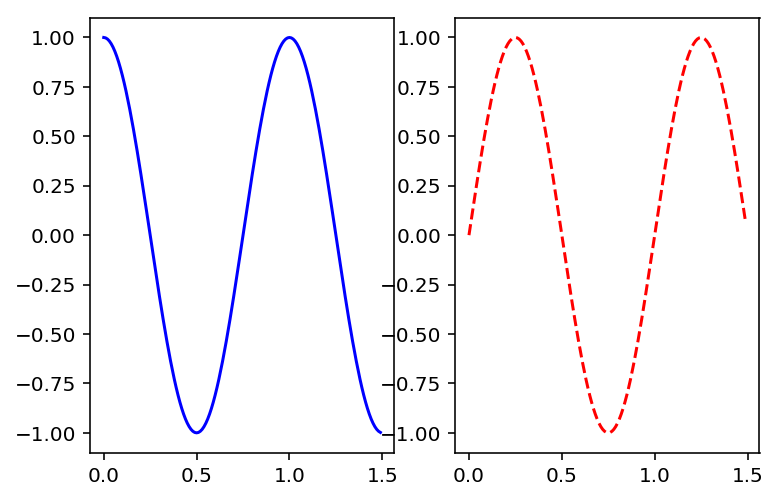

In [4]:
t  = np.arange(0,1.5,0.01)
y1 = np.cos(2*np.pi*t)
y2 = np.sin(2*np.pi*t)

plt.subplot(121)
plt.plot(t,y1,'b-')
plt.subplot(122)
plt.plot(t,y2,'r--')

## 7.7 为图表添加更多元素

### 7.7.1 添加文本

* 添加标题：**plt.title( )**      
  **可以用关键字修改文本属性**
* 添加轴标签：**plt.xlabel( ), plt.ylabel( )**     

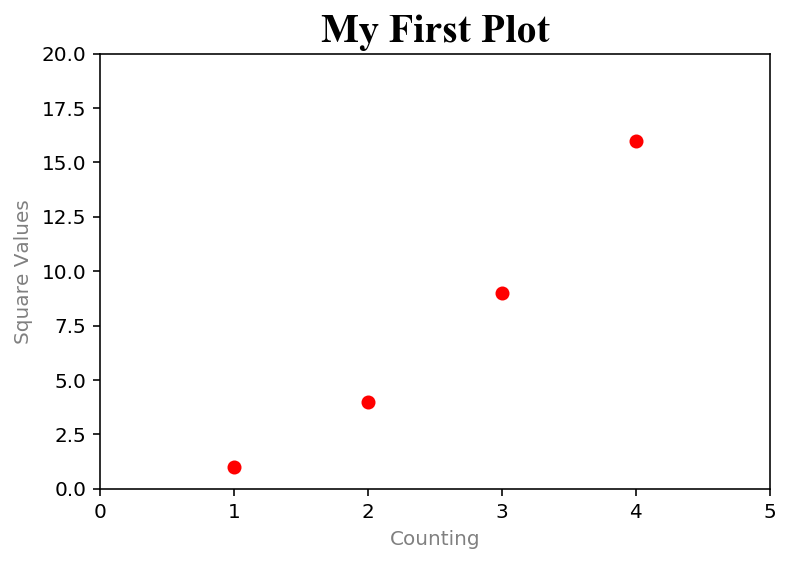

In [5]:
plt.axis([0,5,0,20])
plt.title('My First Plot',fontsize=20,fontname='Times New Roman')
plt.xlabel('Counting',color='gray')
plt.ylabel('Square Values',color='gray')
plt.plot([1,2,3,4],[1,4,9,16],'ro')

* **用text实现在图表任意位置添加文本**
 
 > text( x,y,s,fontdict=None, \*\*kwargs )    

**x,y**为文本在图形中位置坐标，**s** 为要添加的字符串，**fontdict**（可选）为文本字体

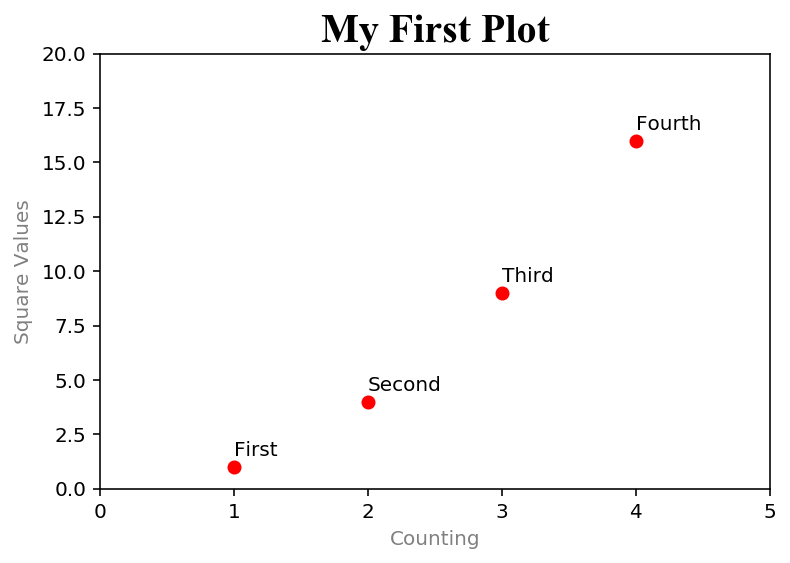

In [6]:
plt.axis([0,5,0,20])
plt.title('My First Plot',fontsize=20,fontname='Times New Roman')
plt.xlabel('Counting',color='gray')
plt.ylabel('Square Values',color='gray')

plt.text(1,1.5,'First')
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')

plt.plot([1,2,3,4],[1,4,9,16],'ro')

* 可以在** r'\$ \$' **之间插入 **LaTeX** 表达式，并可以为公示添加彩色边框。

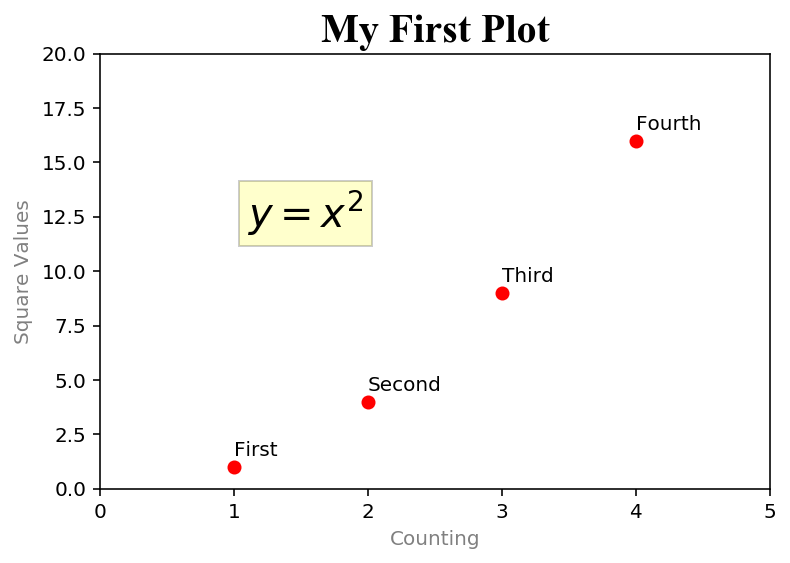

In [7]:
plt.axis([0,5,0,20])
plt.title('My First Plot',fontsize=20,fontname='Times New Roman')
plt.xlabel('Counting',color='gray')
plt.ylabel('Square Values',color='gray')

plt.text(1,1.5,'First')
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')

plt.text(1.1,12,r'$y = x^2$',fontsize=20,bbox={'facecolor':'yellow','alpha':0.2})

plt.plot([1,2,3,4],[1,4,9,16],'ro')

### 7.7.2 添加网格

> plt.grid( True )   

### 7.7.3 添加图例

> plt.legend(['First series'],loc=2)

* loc 控制图例位置，默认为1
 > 0 = 最佳位置 ； 1 = 右上角 ；    
 > 2 = 左上角 ； 3 = 右下角 ；    
 > 4 = 左下角 ； 5 = 右侧 ；      
 > 6 = 左侧垂直居中 ； 7 = 右侧垂直居中 ；    
 > 8 = 下方水平居中 ； 9 = 上方水平居中 ；    
 > 10 = 正中

### 7.8.3 将图片直接保存为图片

> plt.savefig('my_chart.png')      

* 在保存成图像的命令之前不要使用 **plt.show( )**，否则会得到空白图像。


## 7.9 处理日期值

etc：线性图表有八个数据点，按照 **day-month-year** 格式在*x*轴显示日期值

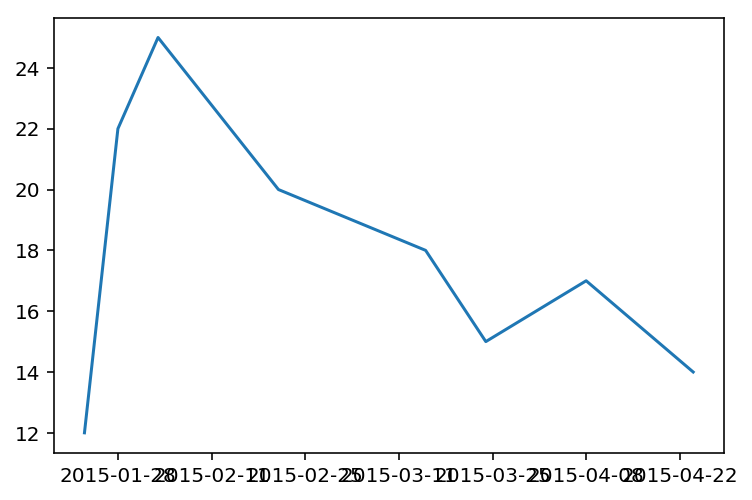

In [8]:
import datetime
events = [datetime.date(2015,1,23),datetime.date(2015,1,28),datetime.date(2015,2,3),datetime.date(2015,2,21),
          datetime.date(2015,3,15),datetime.date(2015,3,24),datetime.date(2015,4,8) ,datetime.date(2015,4,24)]
readings = [12,22,25,20,18,15,17,14]
plt.plot(events,readings)

**可读效果极差**    
* 需要导入 **matplotlib.dates** 模块。     
 用 **MonthLocator** 和 **DayLocator** 函数分别表示月份和日子。    


* 此处只显示年月，把这种格式作为参数传给 **DataFormatter** 函数。   
 定义好两个时间尺度，一个用于日期，一个用于月份。    
 在 **xaxis** 对象上调用 **set_major_locator( )** 和 **set_minor_locator( )**，为 **x** 轴设置两种不同的标签。     
 月份刻度标签的设置，需要用到 **set_major_formatter( )** 函数。

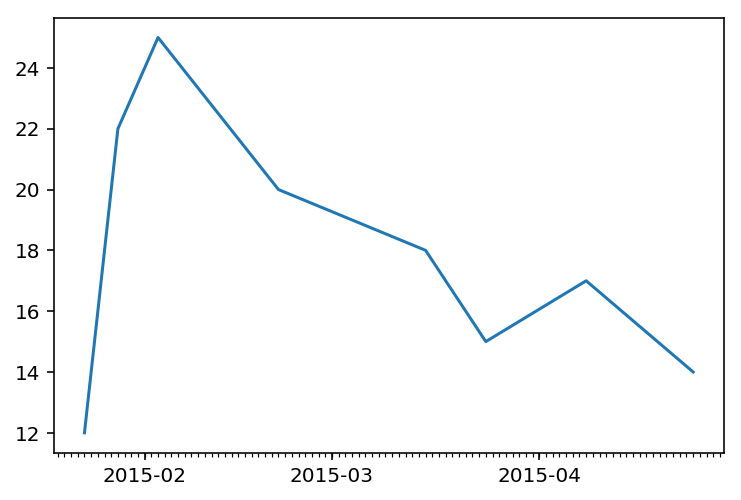

In [9]:
import matplotlib.dates as mdates

months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')
fig, ax = plt.subplots()
plt.plot(events,readings)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)

## 7.10 图表类型

## 7.11 线性图

* 绘制函数图像，例如：
$$y = \frac{\sin(3*x)}{x} $$

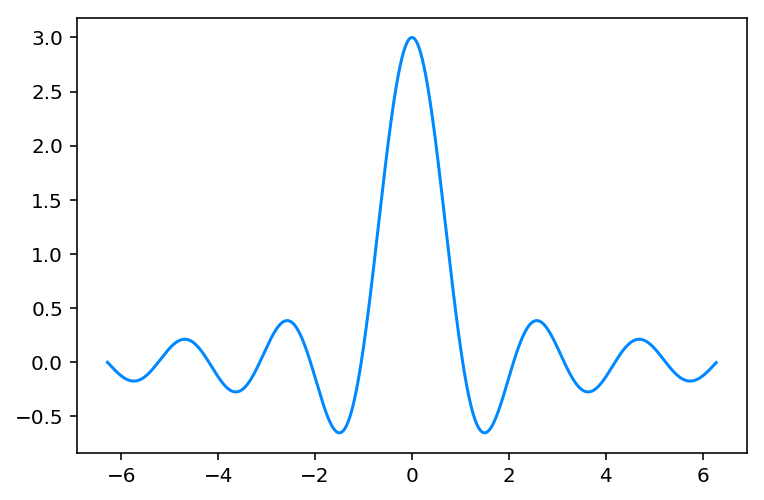

In [10]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(3*x)/x
plt.plot(x,y,color='#0088ff') # 徵羽摩柯蓝

* 也可以拓展例子，显示如下函数：
$$y=\frac{\sin(n*x)}{x}$$
改变取值即可

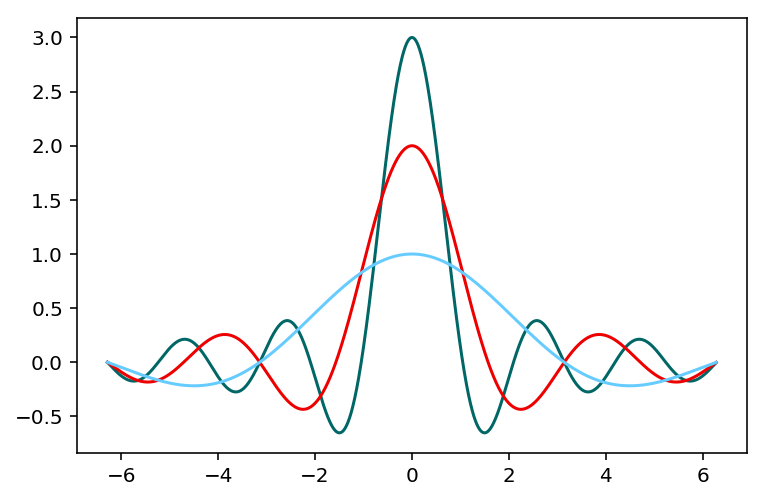

In [11]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(3*x)/x
y2= np.sin(2*x)/x
y3= np.sin(x)/x

plt.plot(x,y,color='#006666')  # 龙牙绿
plt.plot(x,y2,color='#ee0000') # 乐正绫红
plt.plot(x,y3,color='#66ccff') # 天依蓝

* x轴数值范围为 **-2$\pi$～2$\pi$**，但是刻度标签默认使用数值模式。需要用**$\pi$**的倍数代替数值；同理可替代y轴刻度的标签。   
* 用 **xticks( ), yticks( )** 函数，分别为每个函数传入两列数值；第一个列表存储刻度位置，第二个存储刻度的标签。

([<matplotlib.axis.YTick at 0x115056ac8>,
 <a list of 5 Text yticklabel objects>)

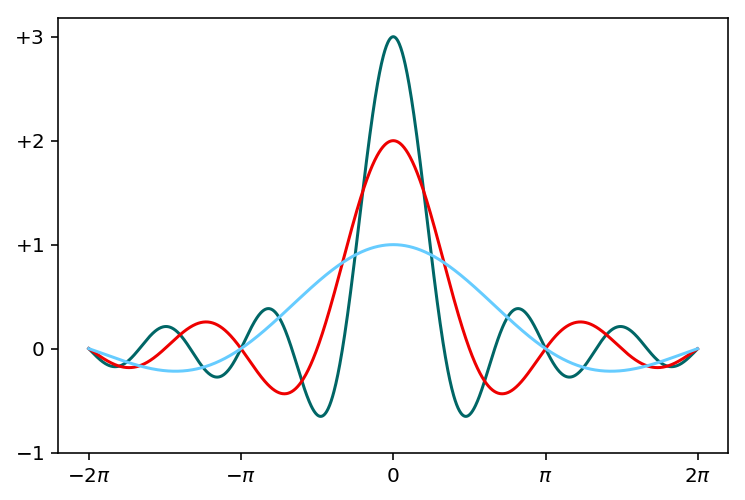

In [12]:
plt.plot(x,y,color='#006666')  
plt.plot(x,y2,color='#ee0000') 
plt.plot(x,y3,color='#66ccff')

plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],
          [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])
plt.yticks([-1,0,+1,+2,+3],
          [r'$-1$',r'0',r'$+1$',r'$+2$',r'$+3$'])

* 要显示为笛卡尔坐标轴，中点穿过（0,0）。    
* 用 **gca( )** 获取 **Axes** 对象，再通过这个对象指定每条边位置：左右下上，可选择组成图形边框的每条边。   
* 使用 **set_color( )** 函数，把颜色设置为 **none**，删除和坐标轴不符合的边（右,上）。   
* 再用 **set_position( )** 移动和 x轴 y轴 相符的边框，使其穿过原点。   

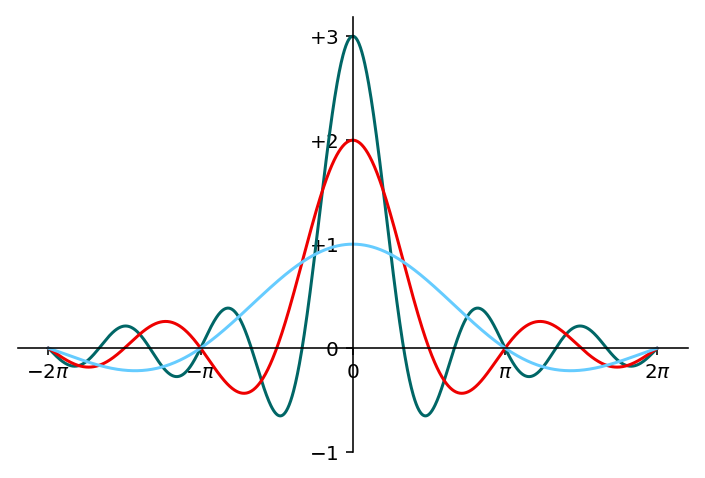

In [13]:
plt.plot(x,y,color='#006666')  
plt.plot(x,y2,color='#ee0000') 
plt.plot(x,y3,color='#66ccff') 

plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],
          [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])
plt.yticks([-1,0,+1,+2,+3],
          [r'$-1$',r'0',r'$+1$',r'$+2$',r'$+3$'])

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

* 用注释和箭头（可选）标注曲线上某一数据点的位置。     
* **matplotlib库**的 **annotate( )** 很适合用于添加注释。虽然有多个关键字参数，但是设置很繁琐。
* 第一个参数为含 **LaTeX** 表达式、要在图形中显示的字符串；
* 随后是各种关键字参数。注释在图表中的位置可以用存放数据点 **[x,y]** 坐标的列来表示，需要把它们传给 **xy** 关键字参数。    
  文本注释和它解释的数据点之间的距离用 **xytext** 关键字指定，用曲线箭头表示出来，箭头属性由 **arrowprops** 关键字参数指定。

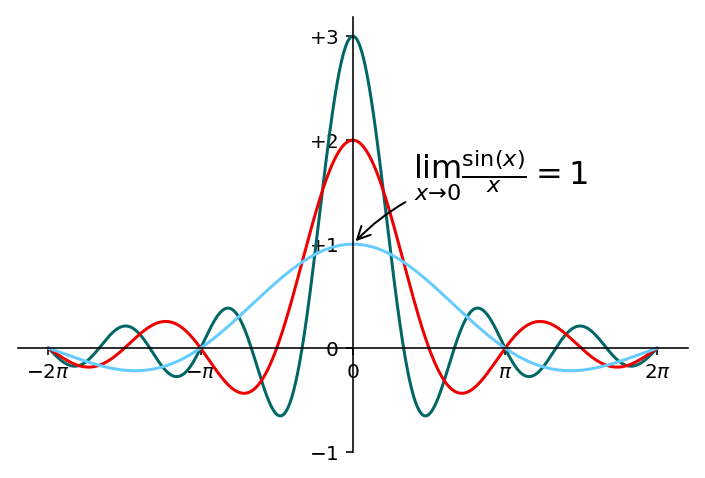

In [14]:
plt.plot(x,y,color='#006666')  
plt.plot(x,y2,color='#ee0000') 
plt.plot(x,y3,color='#66ccff') 

plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],
          [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])
plt.yticks([-1,0,+1,+2,+3],
          [r'$-1$',r'0',r'$+1$',r'$+2$',r'$+3$'])

plt.annotate(r'$\lim_{x\to 0}\frac{\sin(x)}{x}=1$',
            xy=[0,1],xycoords='data',xytext=[30,30],
            fontsize=16,textcoords='offset points',
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### 为pandas数据结构绘制线性图

只需要把 **DF** 作为参数传入 **plot**，即可得到多序列线性图。

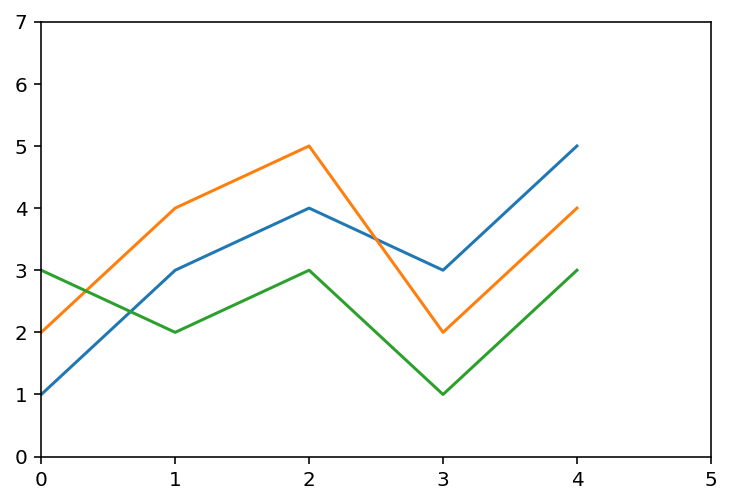

In [15]:
data = { 'series1':[1,3,4,3,5],
         'series2':[2,4,5,2,4],
         'series3':[3,2,3,1,3]}
df = pd.DataFrame(data)
x = np.arange(5)
plt.axis([0,5,0,7])
plt.plot(x,df)

## 7.12 直方图

* 直方图由竖立在 x轴 上的多个相邻的矩形组成，这些矩形把 x轴 拆分成一段段彼此不重叠的线段（**线段的两个端点所标示的数据范围也叫面元**），矩形的面积和落在其所对应的面元的元素数量成正比。     

* **pyplot** 用于绘制直方图的函数 **hist( )**，该函数除了绘制直方图外还可以以元组形式返回直方图的计算结果。**hist** 还可以实现直方图的计算，即可以接收一系列样本个体和期望的面元作为参数，会把样本范围分成多个区间（面元），然后计算每个面元包含的样本个体的数量。运算结果除了以图形形式表示外，还能以元组形式**（n, bins,patches）**返回。    

In [16]:
pop = np.random.randint(0,100,100)
pop

array([99, 48, 83, 12,  1, 15, 43, 48, 66, 99, 17, 32, 70, 87,  9, 58, 49,
       12,  6,  0, 25, 49, 73, 28, 35, 28, 93, 58, 93, 53,  6, 22, 40,  4,
       42, 31, 73, 82, 20, 76, 71, 79, 15, 10, 55, 38, 76, 11, 18,  1,  5,
       54, 11, 10, 13, 67, 64, 28, 93, 95,  3, 65, 60, 24, 12, 38, 89, 33,
       64, 30, 68, 28, 12, 82, 16,  2, 61, 44,  1, 74, 36, 67, 15, 45,  9,
       73, 93, 47, 91, 54, 19, 40, 24, 22, 72, 59, 57, 47, 80, 30])

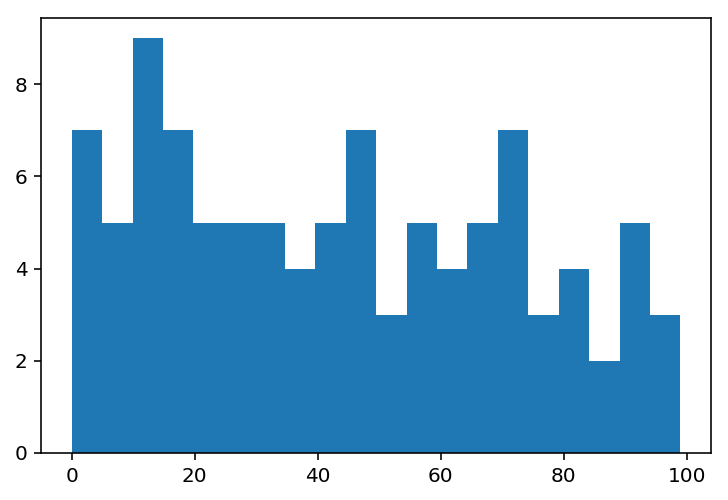

In [17]:
n,bins,patches = plt.hist(pop,bins=20)

## 7.13 条状图

和直方图相似，只不过 x轴 表示的不是数值，而是类别，用 **matplotlib** 的 **bar( )** 生成条状图很简单。

<Container object of 5 artists>

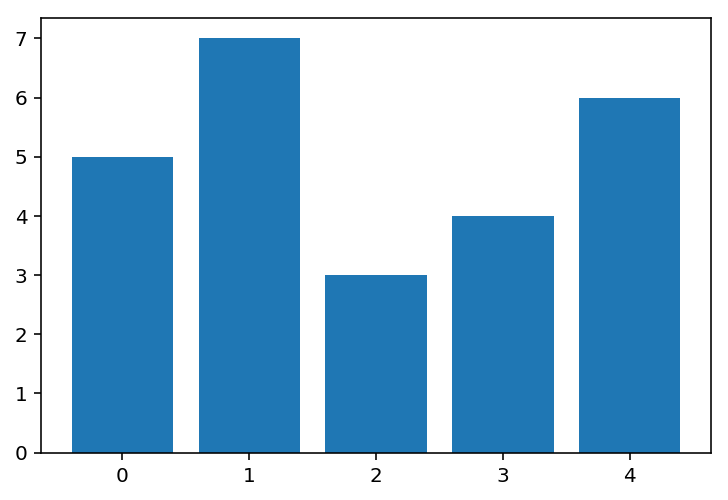

In [18]:
index = [0,1,2,3,4]
values= [5,7,3,4,6]
plt.bar(index,values)

* x轴 上所有标签显示在长条左下角。但由于每个长条对应的是一种类别，最好用刻度标签标明其类别，方法是把各个类别的字符串传递给 **xticks( )**，作为它的第一个参数。

([<matplotlib.axis.XTick at 0x11613f400>,
 <a list of 5 Text xticklabel objects>)

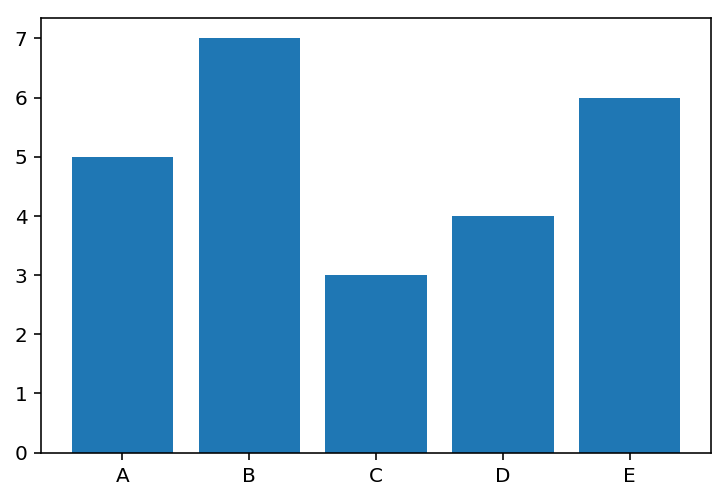

In [19]:
index = np.arange(5)
values1= [5,7,3,4,6]
plt.bar(index,values1)
plt.xticks(index,['A','B','C','D','E'])

在 **bar** 中添加关键字来实现改进。    
* 把包含 **std** 的列表传给 **yerr** 关键字参数，就能添加 **std**。   
 这个参数通常和 **error_kw** 一起用，后者接收其他可以用于显示误差线的关键字参数。    
 常用的是 **eColor, capsize**.       
 **eColor** 指定误差线颜色，**capsize** 指定误差线两头横线宽度。     
 **alpha**：控制彩色条状图的透明度，范围**0～1**，0:完全透明。

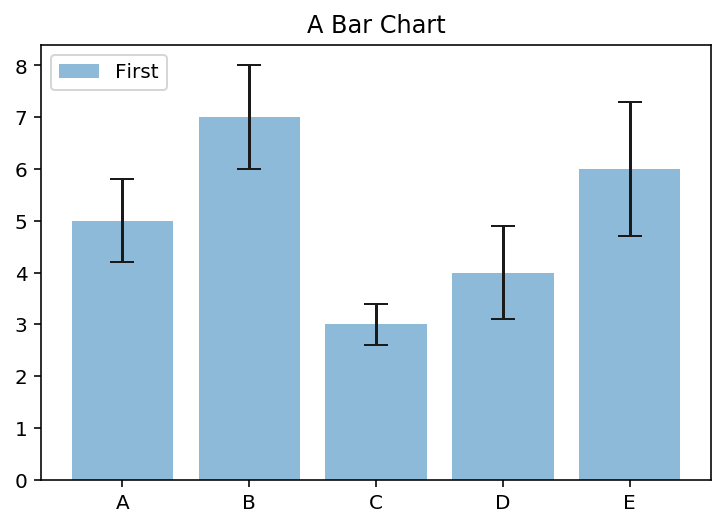

In [20]:
index = np.arange(5)
values1= [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Bar Chart')
plt.bar(index,values1,yerr=std1,error_kw={'ecolor':'0.1','capsize':6},
       alpha=0.5,label='First')
plt.xticks(index,['A','B','C','D','E'])
plt.legend(loc=2)

### 7.13.1 水平条状图

沿水平方向的条状图，用 **barh( )** 实现。

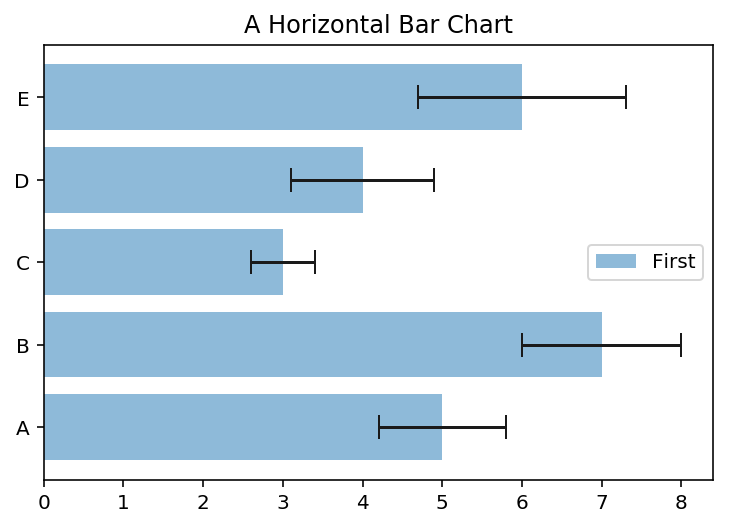

In [21]:
index = np.arange(5)
values1= [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Horizontal Bar Chart')
plt.barh(index,values1,xerr=std1,error_kw={'ecolor':'0.1','capsize':6},
       alpha=0.5,label='First')
plt.yticks(index,['A','B','C','D','E'])
plt.legend(loc=5)

### 7.13.2 多序列条状图

* 此例子要求多个长条共用相同的类别。   
* 即把每个类别占据的空间（一般宽度为1）分为多个部分，建议再额外增加一个空间，以便区分两个相邻类别。

([<matplotlib.axis.XTick at 0x116693d68>,
 <a list of 5 Text xticklabel objects>)

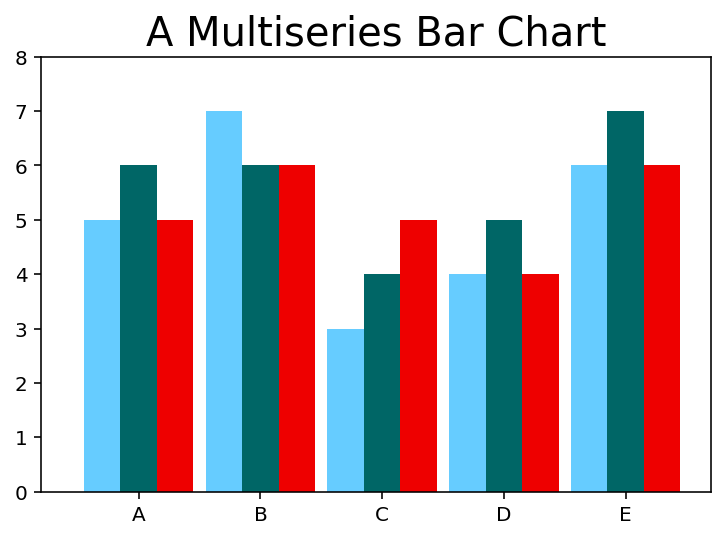

In [22]:
index = np.arange(5)
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.axis([-0.5,5,0,8])
plt.title('A Multiseries Bar Chart',fontsize=20)
plt.bar(index,values1,bw,color='#66ccff')
plt.bar(index+bw,values2,bw,color='#006666')
plt.bar(index+2*bw,values3,bw,color='#ee0000')
plt.xticks(index+bw,['A','B','C','D','E'])

生成多序列水平条状图。
* 用 **barh** 代替 **bar**   
* 用 **ysticks** 代替 **xsticks**   
* 还要交换 **axis** 函数的参数中两条轴的取值范围

([<matplotlib.axis.YTick at 0x11546e6d8>,
 <a list of 5 Text yticklabel objects>)

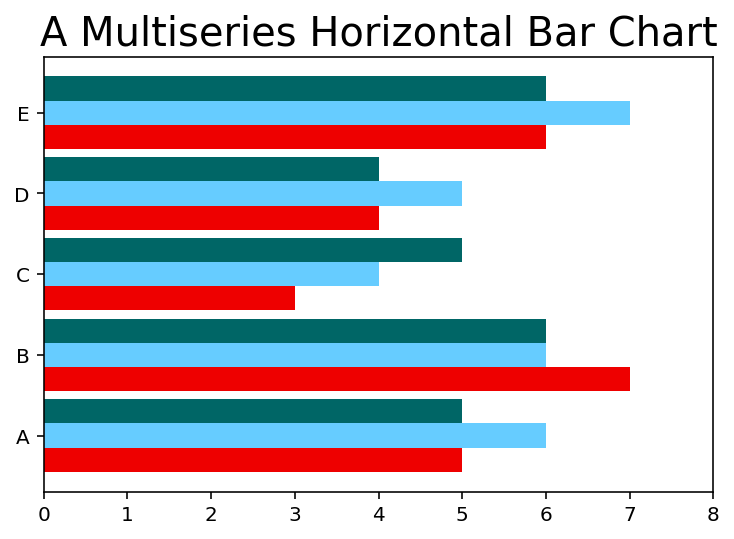

In [23]:
index = np.arange(5)
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.xlim(0,8)
plt.title('A Multiseries Horizontal Bar Chart',fontsize=20)
plt.barh(index,values1,bw,color='#ee0000')
plt.barh(index+bw,values2,bw,color='#66ccff')
plt.barh(index+2*bw,values3,bw,color='#006666')
plt.yticks(index+0.3,['A','B','C','D','E'])

### 7.13.3 为pandas DataFrame生成多序列条状图



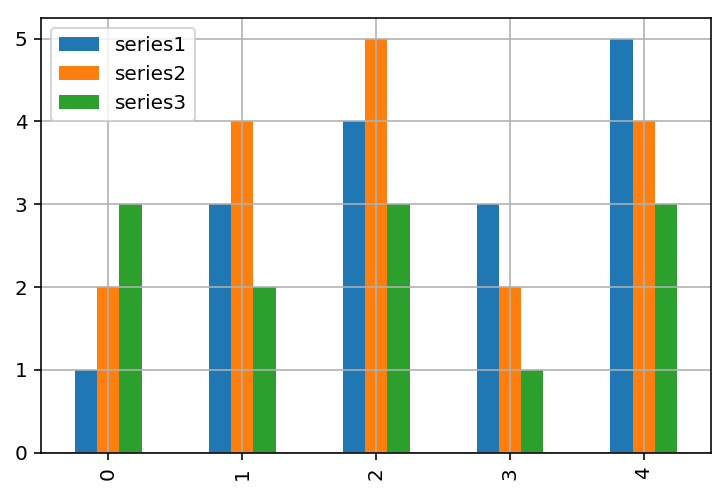

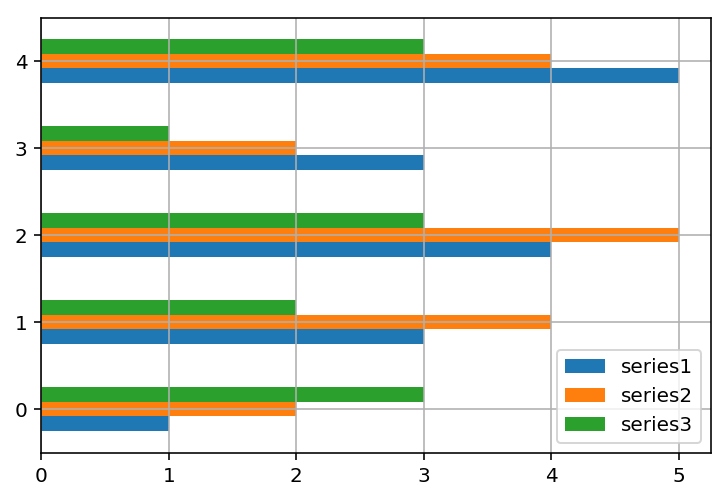

In [24]:
data = { 'series1':[1,3,4,3,5],
         'series2':[2,4,5,2,4],
         'series3':[3,2,3,1,3]}
df = pd.DataFrame(data)
df.plot(kind='bar')
plt.grid(True)

df.plot(kind='barh')
plt.grid(True)

### 7.13.4 多序列堆积条状图

要把简单多序列条状图转换为堆积图，需要在每个 **bar( )** 函数中添加 **bottom** 关键字参数。

([<matplotlib.axis.XTick at 0x116b03a90>,
 <a list of 4 Text xticklabel objects>)

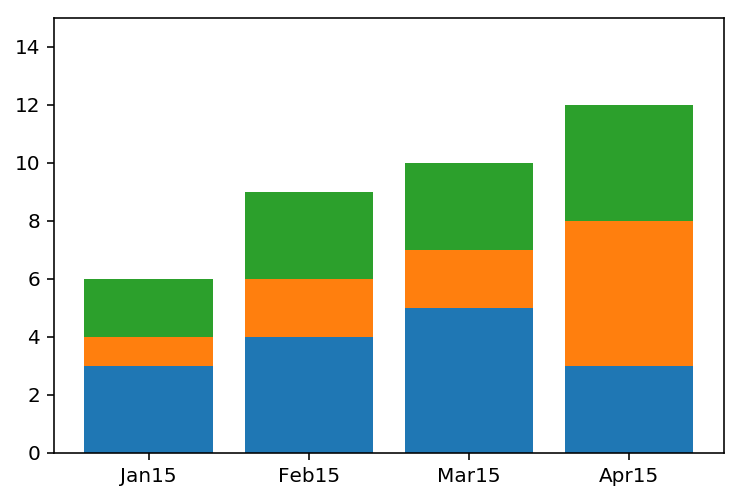

In [25]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.ylim(0,15)
plt.bar(index,series1)
plt.bar(index,series2,bottom=series1)
plt.bar(index,series3,bottom=(series2+series1))
plt.xticks(index,['Jan15','Feb15','Mar15','Apr15'])

([<matplotlib.axis.YTick at 0x116b724e0>,
 <a list of 4 Text yticklabel objects>)

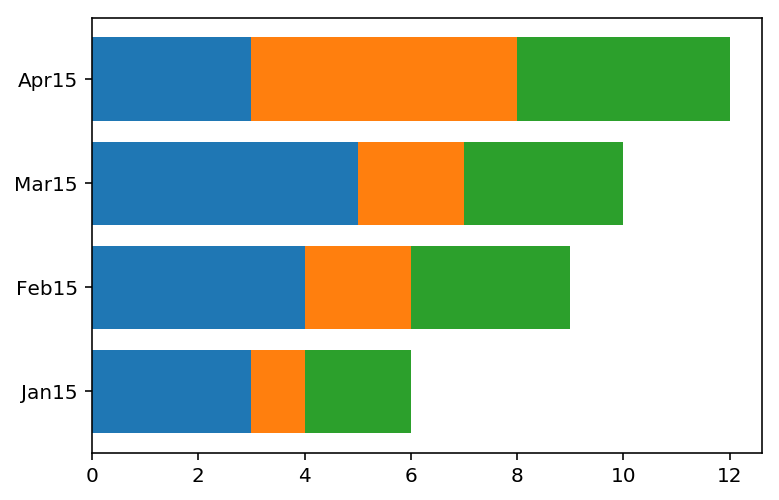

In [26]:
plt.barh(index,series1)
plt.barh(index,series2,left=series1)
plt.barh(index,series3,left=(series2+series1))
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])

除了用不同颜色区分外还可以用不同影线填充条状图，方法如下：

> 先把条状图颜色设置为白色，   
> 然后用 **hatch** 关键字参数指定影线类型，不同影线使用不同字符**（ | 、 / 、 - 、 \ 、 \* ）**表示，每种字符对应一种用来填充条状图形的线条类型。    
> ** 同一符号出现的次数越多，形成的阴影线条越密集，例如， ‘///’ 比 ‘//’ 密集。**

([<matplotlib.axis.YTick at 0x116d506d8>,
 <a list of 4 Text yticklabel objects>)

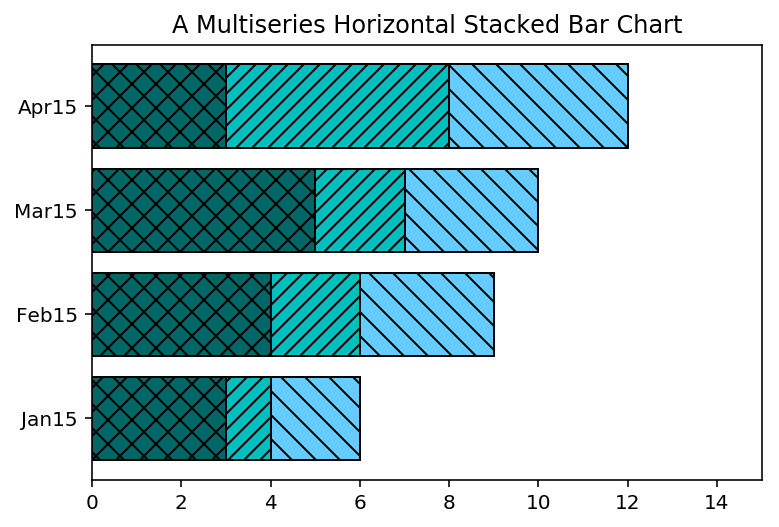

In [27]:
plt.xlim(0,15)
plt.title('A Multiseries Horizontal Stacked Bar Chart')
plt.barh(index,series1,color='#006666',hatch='xx',edgecolor='k')
plt.barh(index,series2,color='c',left=series1,hatch='///',edgecolor='k')
plt.barh(index,series3,color='#66ccff',left=(series2+series1),hatch='\\\\',edgecolor='k')
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])

### 7.13.5 为pandas DataFrame绘制堆积条状图

**只需把 stacked 关键字设置为 True。**

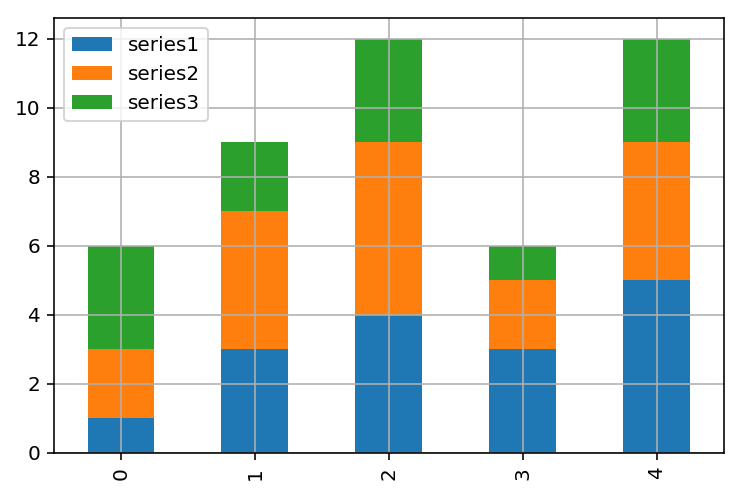

In [28]:
data = { 'series1':[1,3,4,3,5],
         'series2':[2,4,5,2,4],
         'series3':[3,2,3,1,3]}
df = pd.DataFrame(data)
df.plot(kind='bar',stacked=True)
plt.grid(True)

### 7.13.6 其他条状图

用条状图表现对比关系，两列条状图分列于 x轴 两侧，沿 y轴 方向生长。   
要生成这种图形需要先对一个序列的 y值 取反。   
* 用 **for** 循环，在其中用 **text( )** 显示 y值 标签，标签位置可用 **ha** 和 **va** 关键字参数来控制标签在水平和垂直方向上的对齐效果。

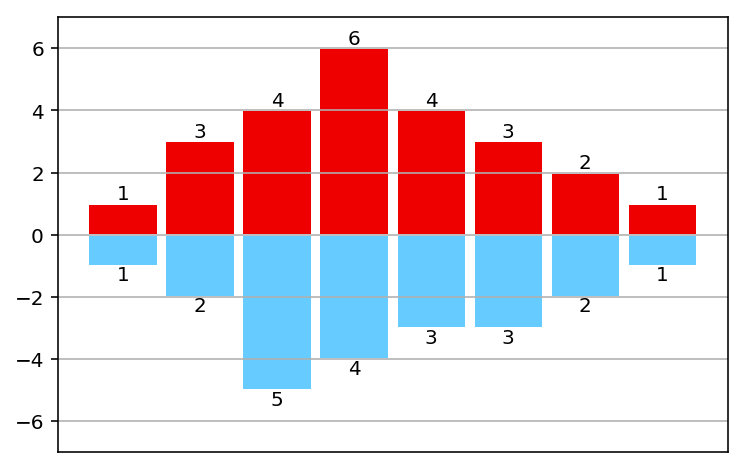

In [29]:
x0 = np.arange(8)
y1 = np.array([1,3,4,6,4,3,2,1])
y2 = np.array([1,2,5,4,3,3,2,1])
plt.ylim(-7,7)
plt.bar(x0,y1,0.9, facecolor='#ee0000',edgecolor='w')
plt.bar(x0,-y2,0.9,facecolor='#66ccff',edgecolor='w')
plt.xticks(())
plt.grid(True)
for x,y in zip(x0,y1):
    plt.text(x,y,'%d'%y,ha='center',va='bottom')
for x,y in zip(x0,y2):
    plt.text(x,-y,'%d'%y,ha='center',va='top')
               

## 7.14 饼图

* 用 **pie** 制作饼图：   
 该函数以要表示的一列数据作为主要参数。    
 可以选用百分比，也可以选用每种类别的实际数值，让 **pie** 自己计算每个列别所占的比例。

(-1.11637372803214,
 1.1007797090739162,
 -1.1163737124158366,
 1.1007797083302826)

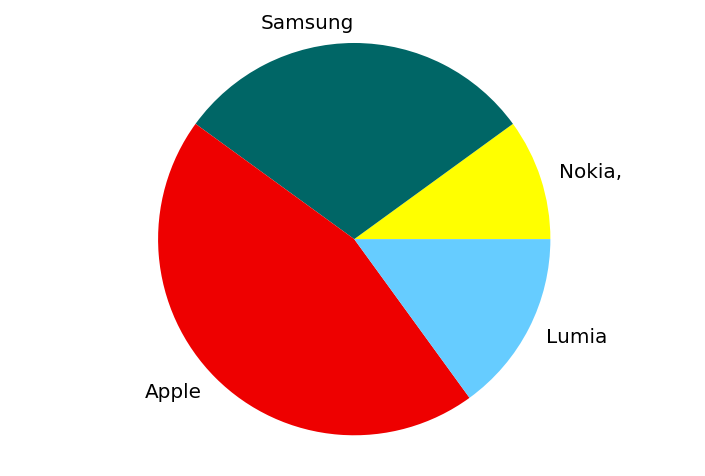

In [30]:
labels = ['Nokia,','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['#FFFF00','#006666','#ee0000','#66ccff']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')

* 为了增强饼图表现力，还可以作出从饼图中抽出一块的效果，为了突出一块，用 **explode** 关键字参数，浮点型**0～1** 。     
 0: 完全没有抽取 ； 1: 完全脱离饼图      
 **startangle** 关键字参数调整饼图的旋转角度，接收**0～360**的 **int**，默认0.   
 用 **shadow** 关键字参数添加阴影效果，设置为 **True** 即可

(-1.2813905696017331,
 1.1158539540293406,
 -1.1101440616265825,
 1.1614828291438197)

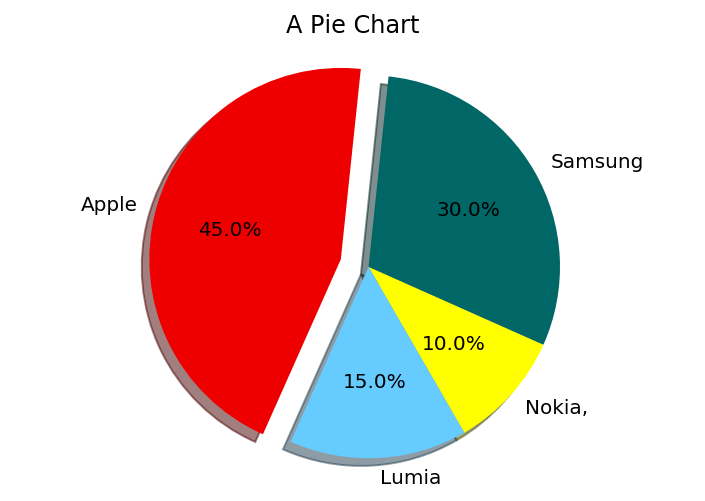

In [31]:
labels = ['Nokia,','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['#FFFF00','#006666','#ee0000','#66ccff']
explode= [0,0,0.15,0]
plt.title('A Pie Chart')
plt.pie(values,labels=labels,colors=colors,
        shadow=True,autopct='%1.1f%%',
        explode=explode,startangle=300)
plt.axis('equal')

### 为DF绘制饼图

每幅饼图只能表示一个序列，**要绘制一个标准的圆形饼图，有必要添加 figsize**

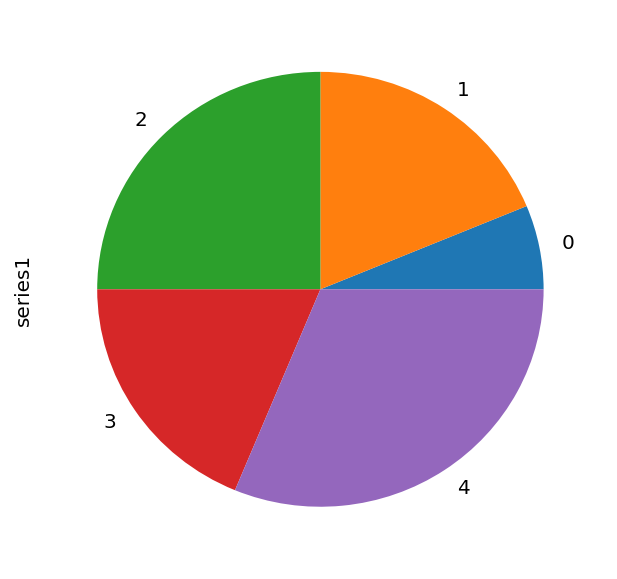

In [32]:
data = {'series1':[1,3,4,3,5]}
df = pd.DataFrame(data)
df['series1'].plot(kind='pie',figsize=(5,5))

## 7.15 高级图表

### 7.15.1 等值线图/等高线图

* 需要先用 ** *$z=f(x,y)$* ** 生成三维结构；     
* 然后定义 **x、y** 取值范围，确定要显示的区域；    
* 用 **$f(x,y)$** 函数计算每对 **(x,y)** 对应的 **z 值**，得到 **z 值** 矩阵；
* 最后，用 **contour( )** 生成三维结构表面的等值线图。



**$$ z = f(x,y) = (1-y^5+x^5)*e^{-x^2-y^2}$$**

<a list of 16 text.Text objects>

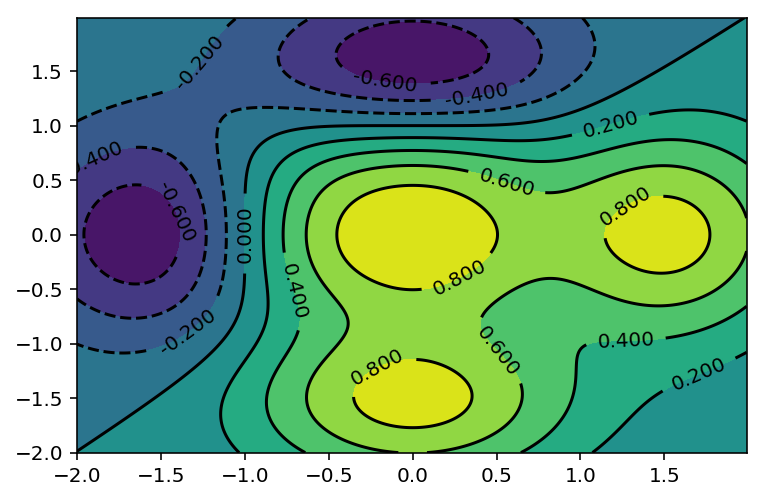

In [33]:
dx = 0.01
dy = 0.01
x = np.arange(-2.0,2.0,dx)
y = np.arange(-2.0,2.0,dy)
X,Y = np.meshgrid(x,y)
def f(x,y):
    return (1-y**5+x**5)*np.exp(-x**2-y**2)
C = plt.contour(X,Y,f(X,Y),8,colors='k')
plt.contourf(X,Y,f(X,Y),8)
plt.clabel(C,inline=1,fontsize=10)

* **colorbar( )** 在图的一侧增加图例     
* **cmap** 参数的值为 **plt.cm.hot** 热力图

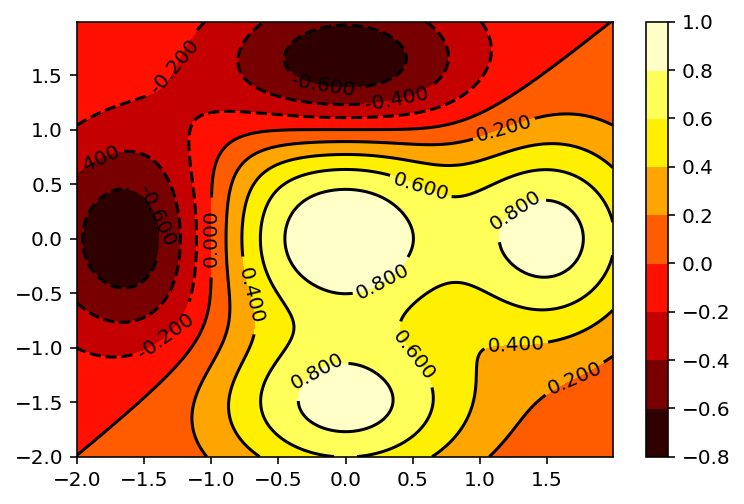

In [34]:
dx = 0.01
dy = 0.01
x = np.arange(-2.0,2.0,dx)
y = np.arange(-2.0,2.0,dy)
X,Y = np.meshgrid(x,y)
def f(x,y):
    return (1-y**5+x**5)*np.exp(-x**2-y**2)
C = plt.contour(X,Y,f(X,Y),8,colors='k')

plt.contourf(X,Y,f(X,Y),8,cmap=plt.cm.hot)

plt.clabel(C,inline=1,fontsize=10)

plt.colorbar()

### 7.15.2 极区图

* 这种图表由一系列呈放射状延伸的区域组成，其中每块区域占据一定角度。    
* 若要用极区图表示两个不同数值，分别指定它们在极区图中所占分量：每块区域所在半径 **r** 和其所在角度 **( $r, \theta$ )** 。
* 制作极区图需要 **bar( )**，需要传递 $\theta$ 列表和 **r** 列表。

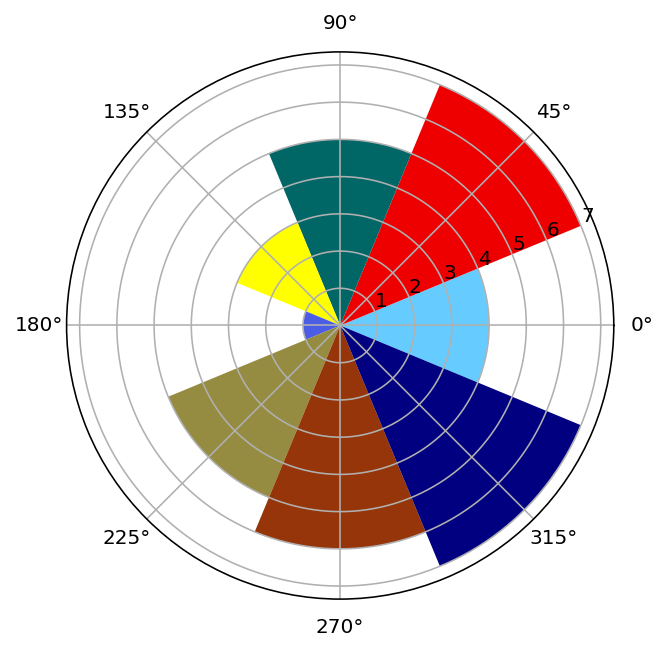

In [35]:
N = 8
theta = np.arange(0, 2*np.pi, 2*np.pi/N)
radii = np.array([4,7,5,3,1,5,6,7])
plt.axes([0.025, 0.025, 0.95, 0.95],polar=True)
colors = np.array(['#66ccff','#ee0000','#006666','#ffff00',
                   '#4b5de4','#958c42','#953509','navy'])
bars = plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)

颜色还可以设置为： **lightgreen, darkred, navy, brown,violet, plum, yellow, darkgreen**

## 7.16 mplot3d

* **mplot3d** 可以实现**3D**数据可视化 **（单独窗口中可旋转显示，JupyterNB就gg了）**。    
* **mplot3d** 仍使用 **Figure** 对象，只是 **Axes** 对象要替换为该工具集的 **Axes3D** 对象，需要先导入。

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### 7.16.1 3D 曲面

* 计算出分割线坐标后，可以用 **plot_surface( )** 绘制曲面。


**$$ z = f(x,y) = (1-y^5+x^5)*e^{-x^2-y^2}$$**

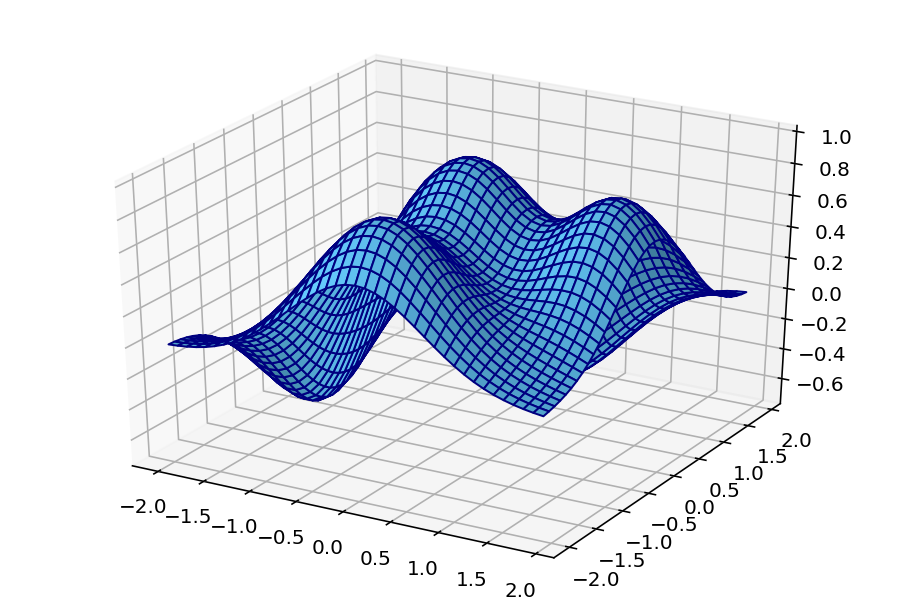

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2,2,0.1)
Y = np.arange(-2,2,0.1)
X,Y = np.meshgrid(X,Y)
def f(x,y):
    return (1-y**5+x**5)*np.exp(-x**2-y**2)
ax.plot_surface(X,Y,f(X,Y),rstride=1,cstride=1,color='#66ccff',edgecolor='navy')

* 修改颜色表会使 **3D** 效果更突出，例如可以用 **cmap** 指定各颜色。     
* 还可以用 **view_init( )** 函数旋转曲面，修改 **elev** 和 **azim** 两个关键字参数，从不同视角查看曲面：    
  **elev** ：指定从哪个高度查看曲面 ； **azim** ：指定曲面旋转的角度

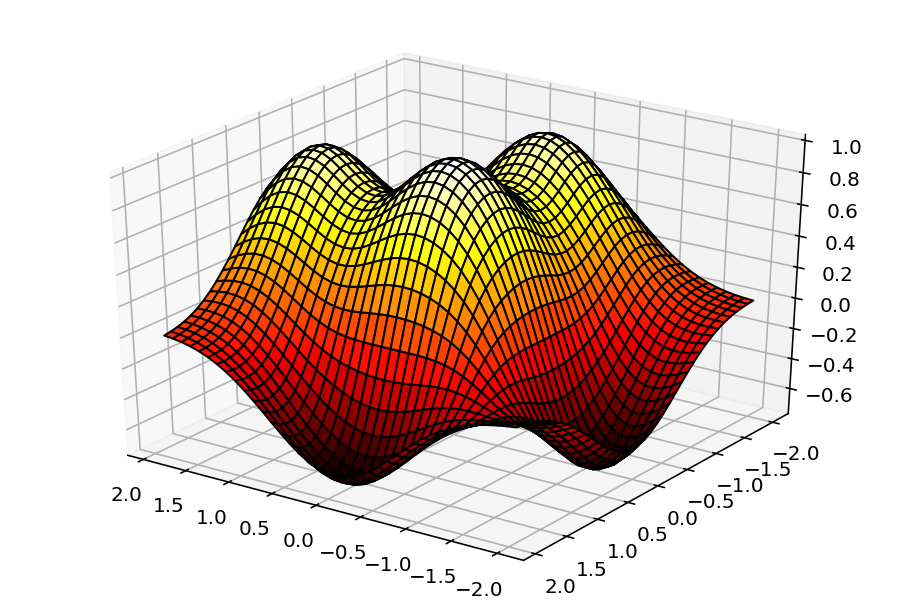

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2,2,0.1)
Y = np.arange(-2,2,0.1)
X,Y = np.meshgrid(X,Y)
def f(x,y):
    return (1-y**5+x**5)*np.exp(-x**2-y**2)
ax.plot_surface(X,Y,f(X,Y),rstride=1,cstride=1,cmap=plt.cm.hot,edgecolor='k')
ax.view_init(elev=30,azim=125)

### 7.16.2 3D 散点图

* 用 **scatter** 函数，和绘制 **2D** 图形相同，但是要应用于 **Axes3D** 对象。

Text(0.5,0,'Z Label')

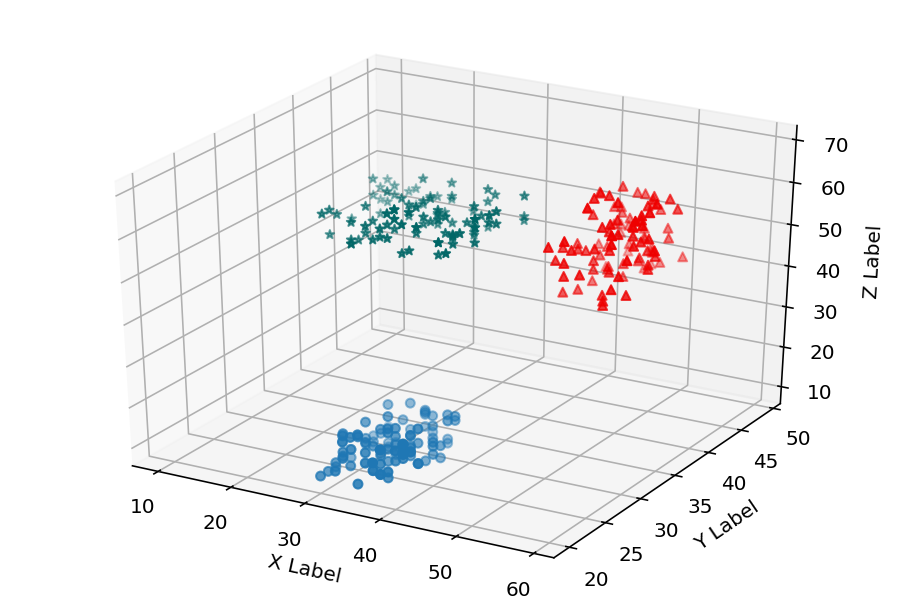

In [39]:
xs = np.random.randint(30,40,100)
ys = np.random.randint(20,30,100)
zs = np.random.randint(10,20,100)

xs2 = np.random.randint(50,60,100)
ys2 = np.random.randint(30,40,100)
zs2 = np.random.randint(50,70,100)

xs3 = np.random.randint(10,30,100)
ys3 = np.random.randint(40,50,100)
zs3 = np.random.randint(40,50,100)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs,ys,zs)
ax.scatter(xs2,ys2,zs2,c='#ee0000',marker='^')
ax.scatter(xs3,ys3,zs3,c='#006666',marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### 7.16.3 3D 条状图

* 将 **bar** 应用于 **Axes3D** 对象。

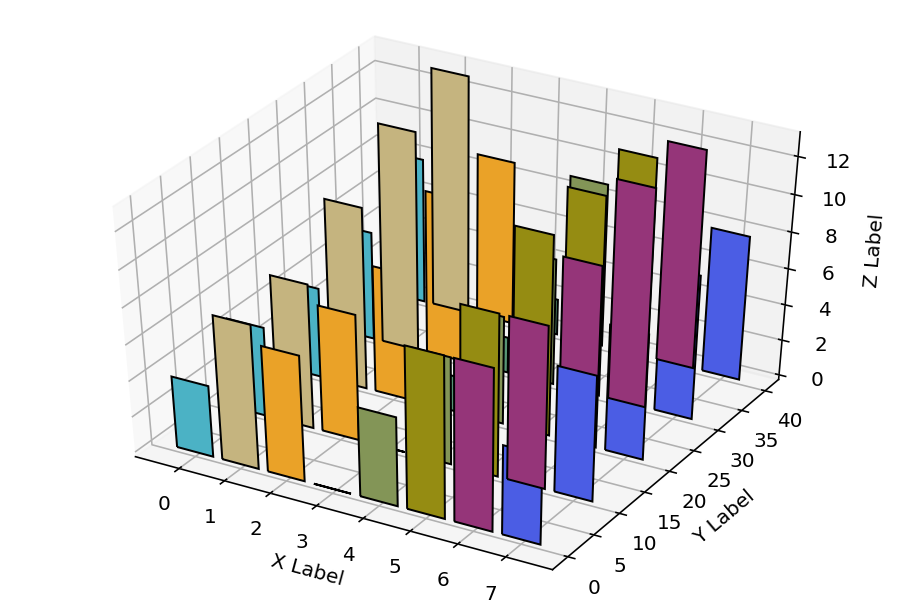

In [40]:
x = np.arange(8)
y = np.random.randint(0,10,8)
y2= y+np.random.randint(0,3,8) 
y3= y2+np.random.randint(0,3,8) 
y4= y3+np.random.randint(0,3,8) 
y5= y4+np.random.randint(0,3,8) 

clr = ['#4bb2c5','#c5b47f','#eaa228','#579575','#839557','#958c12','#953579','#4b5de4']

fig = plt.figure()
ax = Axes3D(fig)
ax.bar(x,y,0,zdir='y',color=clr,edgecolor='k')
ax.bar(x,y2,10,zdir='y',color=clr,edgecolor='k')
ax.bar(x,y3,20,zdir='y',color=clr,edgecolor='k')
ax.bar(x,y4,30,zdir='y',color=clr,edgecolor='k')
ax.bar(x,y5,40,zdir='y',color=clr,edgecolor='k')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=40)

## 7.17 多面板图形


### 7.17.1 在其他子图中显示子图

* 需要将主 **Axes** 对象（主图表）跟放置另一个 **Axes** 对象实例的框架分开。   
 用 **figure( )** 读取到 **Figure** 对象，用 **add_axes( )** 在其上面定义两个 **Axes** 对象。

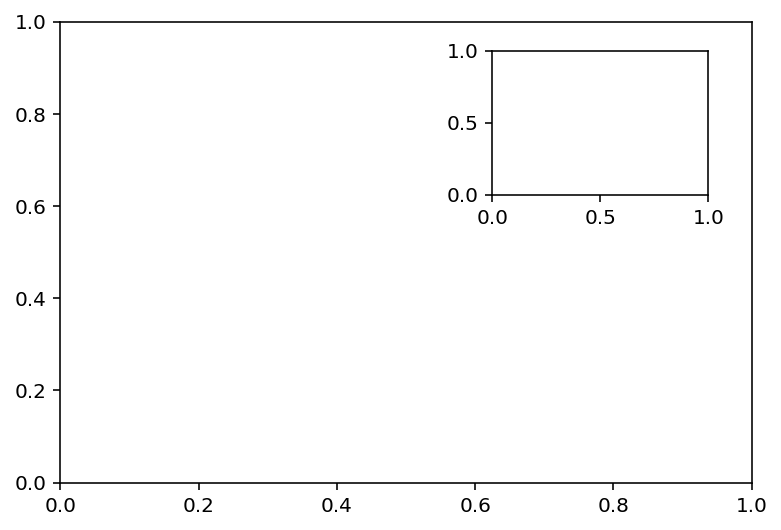

In [41]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
inner_ax = fig.add_axes([0.6,0.6,0.25,0.25])

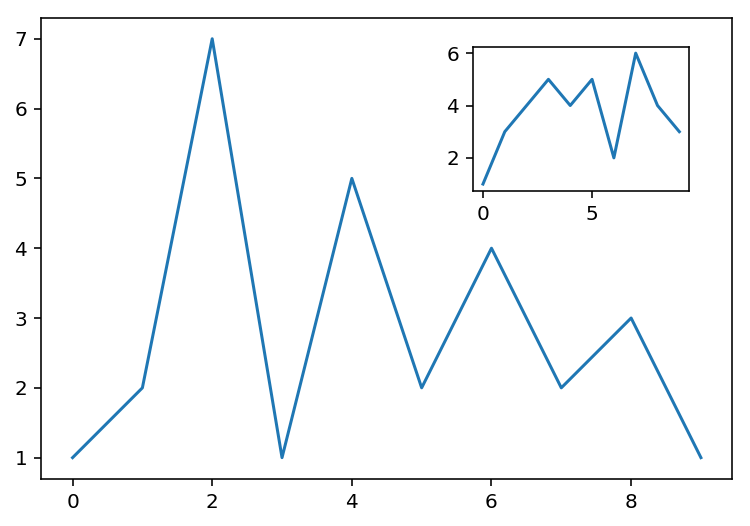

In [42]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
inner_ax = fig.add_axes([0.6,0.6,0.25,0.25])
x1 = np.arange(10)
y1 = np.array([1,2,7,1,5,2,4,2,3,1])
x2 = np.arange(10)
y2 = np.array([1,3,4,5,4,5,2,6,4,3])
ax.plot(x1,y1)
inner_ax.plot(x2,y2)

### 7.17.2 子图网络

* 用 **subplots** 可以将图形分为多个区域，添加多个子图。    
* **matplotlib** 的 **GridSpec( )** 可以用来管理更复杂的情况，它把绘图区域分成多个子区域，可以把一个/多个子区域分配给每一幅子图。   

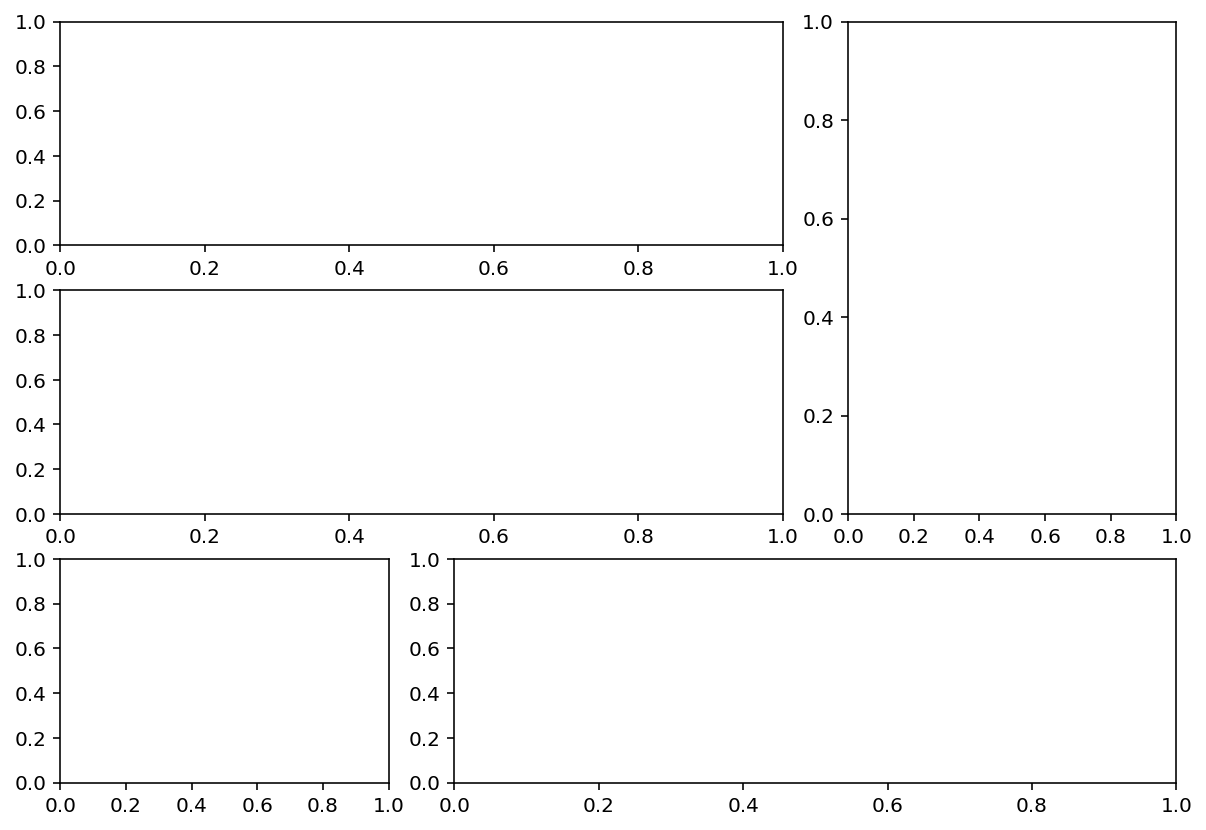

In [43]:
gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(10,7))
fig.add_subplot(gs[1,:2])
fig.add_subplot(gs[0,:2])
fig.add_subplot(gs[2,0])
fig.add_subplot(gs[:2,2])
fig.add_subplot(gs[2,1:])

* 在 **add_subplot( )** 返回的 **Axes** 对象上调用 **plot( )** 对象，绘制相应图形。

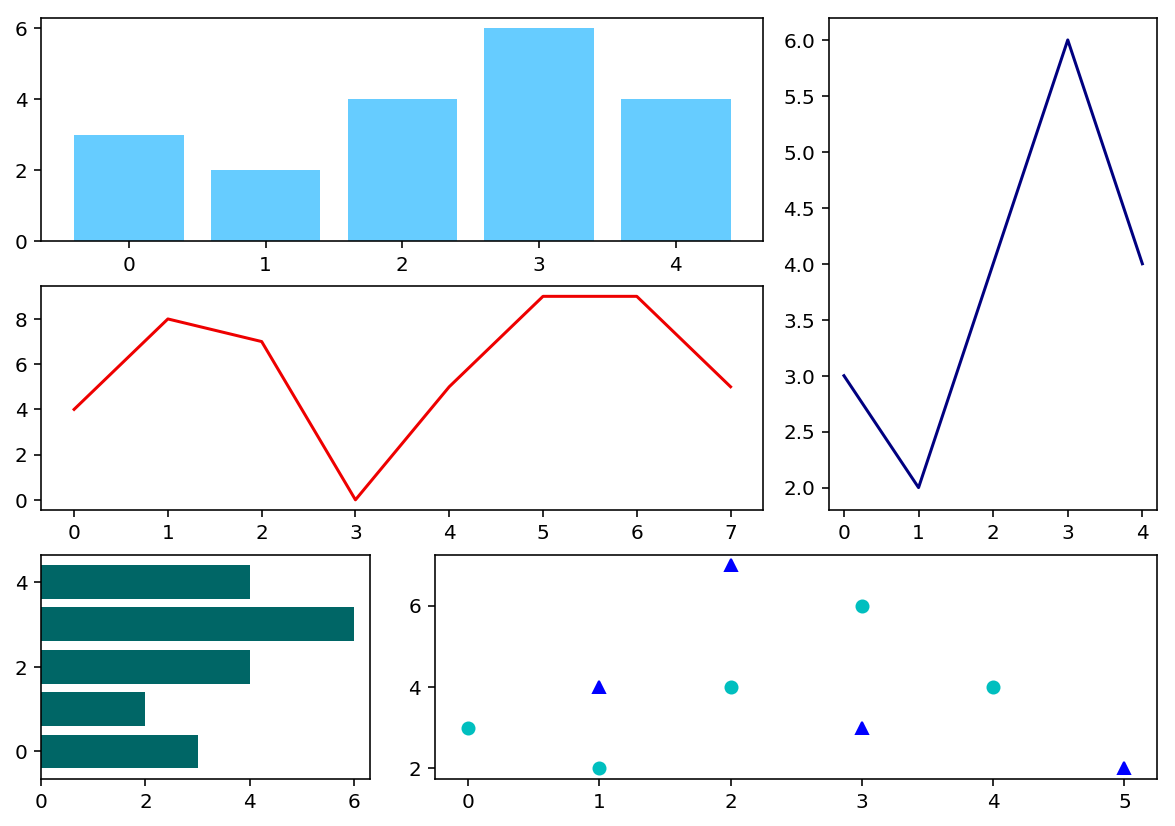

In [44]:
gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(10,7))
x1 = np.array([1,3,2,5])
y1 = np.array([4,3,7,2])
x2 = np.arange(5)
y2 = np.array([3,2,4,6,4])

s1 = fig.add_subplot(gs[1,:2])
s1.plot(x,y,'#ee0000')

s2 = fig.add_subplot(gs[0,:2])
s2.bar(x2,y2,color='#66ccff')

s3 = fig.add_subplot(gs[2,0])
s3.barh(x2,y2,color='#006666')

s4 = fig.add_subplot(gs[:2,2])
s4.plot(x2,y2,'navy')

s5 = fig.add_subplot(gs[2,1:])
s5.plot(x1,y1,'b^',x2,y2,'co')